In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
# parameters
N  = 50
h0 = -np.pi/2

In [4]:
# create the dataset
X = stats.laplace_asymmetric.rvs(2,size=N)
dataMean = np.mean(X)

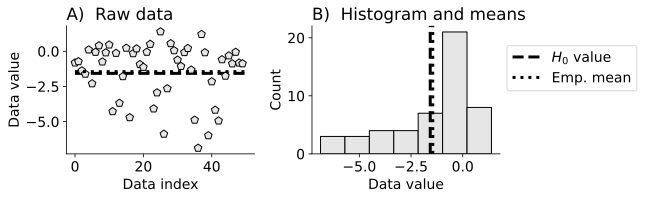

In [5]:
# plot
_,axs = plt.subplots(1,2,figsize=(9,3))

axs[0].plot(X,'kp',markersize=8,markerfacecolor=(.9,.9,.9),label='Data')
axs[0].plot([0,N],[h0,h0],'k--',zorder=-10,linewidth=3,label=r'$H_0$ value')
axs[0].plot([0,N],[dataMean,dataMean],'k:',linewidth=3,label='Emp. mean')
axs[0].set(xlabel='Data index',ylabel='Data value')
axs[0].set_title(r'A)  Raw data')

axs[1].hist(X,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1].axvline(h0,linestyle='--',color='k',linewidth=3,label=r'$H_0$ value')
axs[1].axvline(dataMean,linestyle=':',color='k',linewidth=3,label=r'Emp. mean')
axs[1].set(xlabel='Data value',ylabel='Count')
axs[1].set_title(r'B)  Histogram and means')
axs[1].legend(bbox_to_anchor=[1,.9])

# display the figure
plt.tight_layout()
plt.show()

In [6]:
# t-tests

# manual calculation
t_num = dataMean - h0
t_den = np.std(X,ddof=1) / np.sqrt(N)

tval  = t_num / t_den
pval  = 1-stats.t.cdf( np.abs(tval) ,N-1)
pval *= 2 # double it for 2-tailed test    


In [7]:
# using scipy.stats
r  = stats.ttest_1samp(X,h0)
t  = r.statistic
df = r.df
p  = r.pvalue

In [8]:
# print both results
print(f'Manual ttest: t({N-1})={tval:.3f}, p={pval:.3f}')
print(f'Scipy  ttest: t({df})={t:.3f}, p={p:.3f}')
 

Manual ttest: t(49)=0.427, p=0.671
Scipy  ttest: t(49)=0.427, p=0.671


# Exe 2

In [9]:
# how often do we get subthreshold results?

nExps = 500
issig = np.zeros(nExps,dtype=bool) 
means = np.zeros(nExps)
stds  = np.zeros(nExps)

In [10]:
# run the experiment
for i in range(nExps):

  # generate data and store the mean/std
  X = stats.laplace_asymmetric.rvs(2,size=N)
  means[i] = np.mean(X)
  stds[i]  = np.std(X,ddof=1)

  # run the ttest and store if "significant"
  r = stats.ttest_1samp(X,h0)
  issig[i] = r.pvalue<.05


In [11]:
# print the results
print(f'p<.05 in {np.sum(issig)}/{nExps} times.')

p<.05 in 49/500 times.


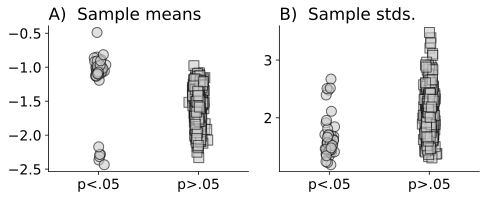

In [12]:
# plot
_,axs = plt.subplots(1,2,figsize=(7,3))

# means
axs[0].plot(np.random.randn(sum(issig))/40,means[issig],
            'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].plot(np.random.randn(sum(~issig))/40+1,means[~issig],
            'ks',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['p<.05','p>.05'],
           title=r'A)  Sample means')

# stds
axs[1].plot(np.random.randn(sum(issig))/40,stds[issig],
            'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[1].plot(np.random.randn(sum(~issig))/40+1,stds[~issig],
            'ks',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[1].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['p<.05','p>.05'],
           title=r'B)  Sample stds.')

# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [13]:
NperSample = 40
MDatasets = 25

In [14]:
# data
X = np.random.normal(loc=1,scale=1,size=(NperSample,MDatasets))

In [15]:
# confirm data size
print('Data size should be sample-size X datasets:')
print(X.shape)
     

Data size should be sample-size X datasets:
(40, 25)


In [16]:
# ttest with matrix input
ttest_matrix = stats.ttest_1samp(X,0)

In [17]:
# ttest in for-loop over each column (each dataset)
ttest_4loop = np.zeros(MDatasets)
for i in range(MDatasets):
  ttest_4loop[i] = stats.ttest_1samp(X[:,i],0).statistic
     


In [18]:
# print the results
print('Matrix  |  Vector')
print('--------|--------')
for i in range(MDatasets):
  print(f'{ttest_matrix.statistic[i]:.4f}  |  {ttest_4loop[i]:.4f}')


Matrix  |  Vector
--------|--------
5.7496  |  5.7496
5.5054  |  5.5054
4.7441  |  4.7441
7.5076  |  7.5076
5.6672  |  5.6672
5.1592  |  5.1592
4.8236  |  4.8236
6.1146  |  6.1146
4.8748  |  4.8748
7.3336  |  7.3336
8.6278  |  8.6278
6.8646  |  6.8646
5.5095  |  5.5095
6.4764  |  6.4764
6.8362  |  6.8362
4.1438  |  4.1438
5.8472  |  5.8472
4.3345  |  4.3345
7.5718  |  7.5718
5.8360  |  5.8360
6.0486  |  6.0486
6.4347  |  6.4347
6.9416  |  6.9416
6.9065  |  6.9065
6.2550  |  6.2550


# Exe 4

In [19]:
# data parameters
N = 40
k = 300


In [20]:
# list of standard deviations
stds = np.linspace(.1,3,k)

In [21]:
# initialize the t/p vectors
t = np.zeros(k)
p = np.zeros(k)
s = np.zeros(k) 

In [22]:
for i in range(len(stds)):
  X = np.random.normal(0,stds[i],size=N)
  X = X-np.mean(X) + .5 # force mean=.5
  ttest = stats.ttest_1samp(X,0)
  t[i]  = ttest.statistic
  p[i]  = ttest.pvalue

  # get the sample std 
  s[i] = np.std(X,ddof=1)

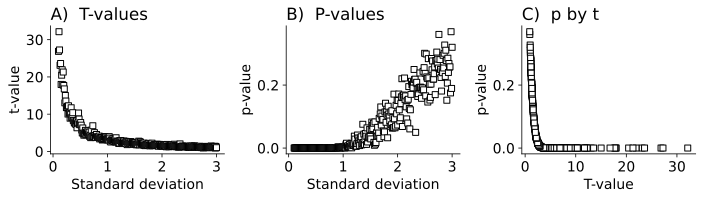

In [23]:
# plot
_,axs = plt.subplots(1,3,figsize=(10,3))

# t's
axs[0].plot(stds,t,'ks',markerfacecolor='w')
axs[0].set(xlabel='Standard deviation',ylabel='t-value',title=r'A)  T-values')

# p's
axs[1].plot(stds,p,'ks',markerfacecolor='w')
axs[1].set(xlabel='Standard deviation',ylabel='p-value',title=r'B)  P-values')

# t and p
axs[2].plot(t,p,'ks',markerfacecolor='w')
axs[2].set(xlabel='T-value',ylabel='p-value',title=r'C)  p by t')

# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [24]:
# correlation coefficient 
r = np.corrcoef(stds,s)
r

array([[1.       , 0.9729893],
       [0.9729893, 1.       ]])

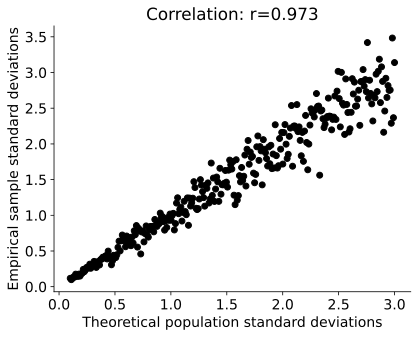

In [25]:
# plot
plt.plot(stds,s,'ko')
plt.xlabel('Theoretical population standard deviations')
plt.ylabel('Empirical sample standard deviations')
plt.title(f'Correlation: r={r[0,1]:.3f}',loc='center')

plt.show()

# Exe 6

In [26]:
nExperiments = 250
meanoffsets = np.linspace(0,.3,51)
samplesizes = np.arange(10,811,step=50)

In [27]:
# initialize
propSig = np.zeros((len(samplesizes),len(meanoffsets)))

In [28]:
# loop over sample sizes
for sidx,ssize in enumerate(samplesizes):

  # loop over effect sizes
  for eidx,effect in enumerate(meanoffsets):

    # generate the data
    X = np.random.normal(loc=effect,scale=1.5,size=(ssize,nExperiments))

    # run the t-test and store the results
    T = stats.ttest_1samp(X,0)
    propSig[sidx,eidx] = 100*np.mean( T.pvalue<.05 )